# Predicting Insurance Premiums using Machine Learning

---

The problem covered in this notebook is quite a common one in Data Science. Suppose we work at an insurance company as analysts; our task is to allocate appropriate premium charges for our clients; given the indicators (and response variable) in our historical dataset -  `insurance.csv`. 

---

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()


## Dataset Cleaning and Preprocessing
---


Before we begin, it is important to remember that out goal is to gain insights which could lead to a reliable prediction of 'charges', given the other indicators. With that, we can proceed to plan our intitial steps by manipulating the dataset into giving us favourable data types which are not misleading.

In [10]:
df = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1336 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


2 non-null values must be filled. As it is a discrete numeric data type, we made the assumption for the number children to be 0, which should not jeopardise our dataset integrity.

In [12]:
# NULL data points filled with standard value of zero(0)
df = df.fillna(0)

# Changing the dtypes appropriately for data exploration

df['children'] = df['children'].astype(int)

unique_values = df['smoker'].unique()
value_map = {}
for i, value in enumerate(unique_values):
    value_map[value] = i + 1
df['smoker_bool'] = df['smoker'].replace(value_map)

unique_values = df['sex'].unique()
value_map = {}
for i, value in enumerate(unique_values):
    value_map[value] = i + 1
df['sex_bool'] = df['sex'].replace(value_map)

unique_values = df['region'].unique()
value_map = {}
for i, value in enumerate(unique_values):
    value_map[value] = i + 1
df['region_cat'] = df['region'].replace(value_map)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_bool  1338 non-null   int64  
 8   sex_bool     1338 non-null   int64  
 9   region_cat   1338 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.7+ KB


,age,sex,bmi,children,smoker,region,charges,smoker_bool,sex_bool,region_cat
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1
1,18,male,33.770,1,no,southeast,1725.55230,2,2,2
2,28,male,33.000,3,no,southeast,4449.46200,2,2,2
3,33,male,22.705,0,no,northwest,21984.47061,2,2,3
4,32,male,28.880,0,no,northwest,3866.85520,2,2,3



After cleaning the dataset and replacing '/Users/kauthar/Desktop/insurance.csv', it is now prepared for further exploration. 

The EXTENDED dataset now consists of 9 columns. The 'smoker_bool', 'sex_bool' and 'region_cat' columns were appended to allow for further analysis below (EDA, correlation, etc.)

The new data types could also be used to predict our response variable (charges, dtype->float). 




## Exploratory Data Analysis
---


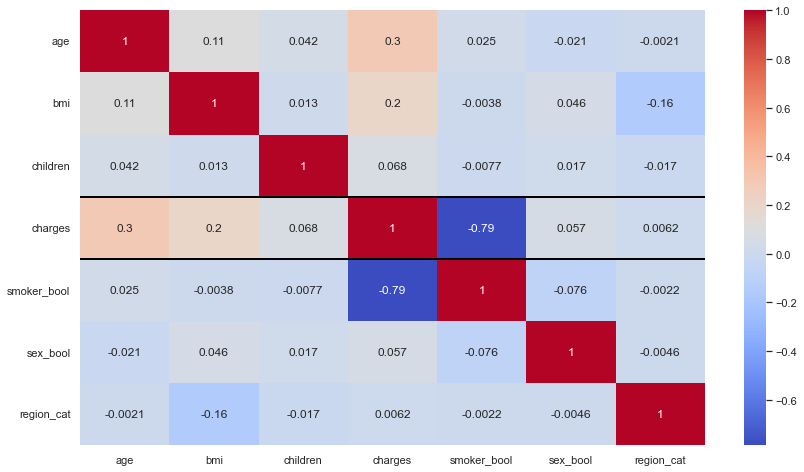

In [13]:
#  Checking for Correlation
columns_to_check = ['age', 'bmi', 'children', 'charges', 'smoker_bool', 'sex_bool', 'region_cat']
correlation_matrix = df[columns_to_check].corr()
fig, ax = plt.subplots(figsize=(14, 8))
sb.set(style="darkgrid")
heatmap = sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
heatmap.axhline(y=3, color='black', linewidth=2)
heatmap.axhline(y=4, color='black', linewidth=2)
plt.show()


By observing the 'charges' row, it is reasonable to deduce that the top three variables which affect the value of charges the most are 'smoker_bool', 'age' and 'bmi' respectively, while the rest show little to no correlation at all. We can now proceed to do further analysis for the three mentioned variables, which may give us deeper insights for the generation of our machine learning model.



### Exploratory Data Analysis (BMI)
---


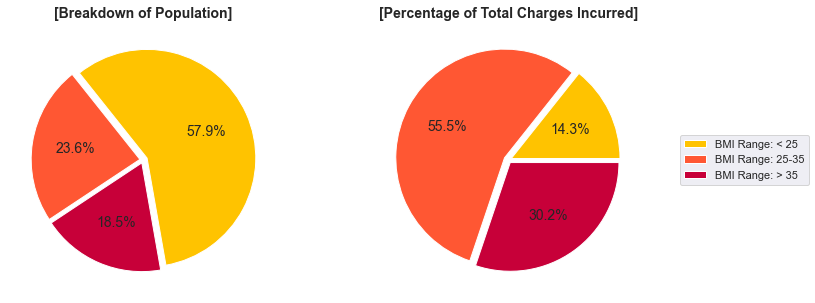

In [38]:
df = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 25, 35, 100])
bmi_counts = df['bmi_category'].value_counts()

sns.set_style("white")
sns.set_palette("pastel")
sns.set(rc={"figure.facecolor": "white"})
plt.figure(figsize=(12, 5))
plt.rcParams.update({'font.size': 14})

# First pie chart
plt.subplot(121)
colors = ['#FFC300', '#FF5733', '#C70039']
explode = (0.04, 0.03, 0.03)
plt.pie(bmi_counts, labels=None, colors=colors, explode=explode, autopct='%1.1f%%', startangle=280)
plt.title('[Breakdown of Population]', fontsize=14, fontweight='bold')

# Second pie chart
plt.subplot(122)
bmi_charge_total = df.groupby('bmi_category')['charges'].sum()
bmi_charge_percentage = bmi_charge_total / df['charges'].sum() * 100
colors = ['#FFC300', '#FF5733', '#C70039']
explode = (0.03, 0.04, 0.03)
plt.pie(bmi_charge_percentage, labels=None, colors=colors, explode=explode, autopct='%1.1f%%', startangle=0)
plt.title('[Percentage of Total Charges Incurred]', fontsize=14, fontweight='bold')

plt.legend(labels=['BMI Range: < 25', 'BMI Range: 25-35', 'BMI Range: > 35'], loc="center left", bbox_to_anchor=(1.11, 0.5))
plt.show()

The purpose of the visualisation above is to show that; despite nearly 60% of the population having a BMI of less than 25, they only make up 14.3% of the total incurred charges. On the other hand, the orange and red colour-coded categories roughly doubled their population:charges ratio. This led us to think that maybe, the higher the BMI, the higher the charges (linear relation). 

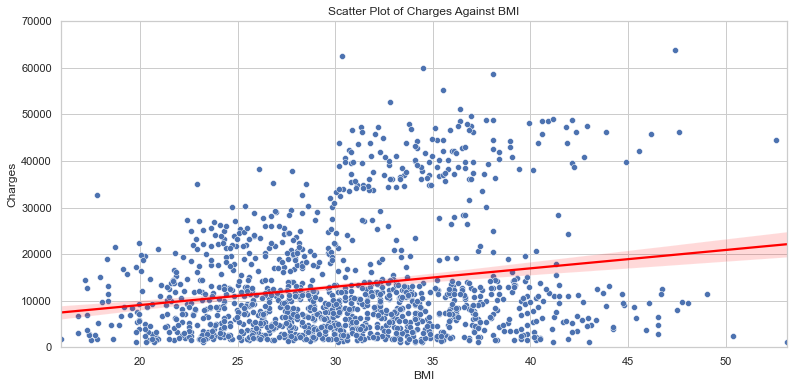

Correlation coefficient: 0.20


In [45]:
# Create a scatter plot with charges against BMI
sb.set_style("whitegrid")
plt.figure(figsize=(13, 6))
sb.scatterplot(x='bmi', y='charges', data=df)

# Add the best-fit line
sb.regplot(x='bmi', y='charges', data=df, scatter=False, color='red')

# Set the title, x and y labels, and adjust the axis limits
plt.title('Scatter Plot of Charges Against BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.xlim([min(df['bmi']), max(df['bmi'])])
plt.ylim([0, 70000])

# Show the plot
plt.show()

# Calculate the correlation coefficient and p-value
corr, p_value = pearsonr(df['bmi'], df['charges'])
print(f"Correlation coefficient: {corr:.2f}")

However, when we implemented the scatter plot above, we were not able to find a clear fit. Nontheless, we still believe in the potential this finding has for our ML model later on.


### Exploratory Data Analysis (Age)
---


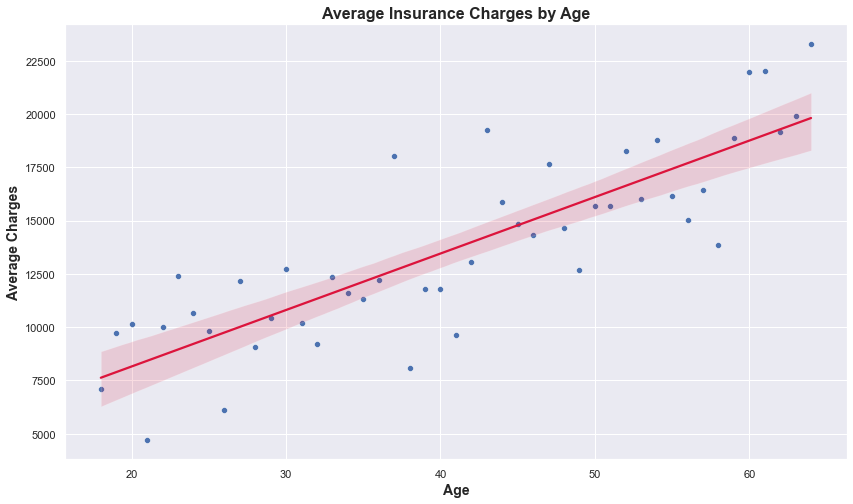

Correlation coefficient: 0.84
P-value: 1.56e-13


In [22]:
from scipy.stats import pearsonr

plt.figure(figsize=(14, 8))
data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')

# Grouping the data by age and calculating the average charges for each group
avg_charges_by_age = data.groupby('age')['charges'].mean().reset_index()

# Remove outliers
q1 = avg_charges_by_age['charges'].quantile(0.25)
q3 = avg_charges_by_age['charges'].quantile(0.75)
iqr = q3 - q1
outlier_threshold = q3 + 1.5 * iqr
avg_charges_by_age = avg_charges_by_age[avg_charges_by_age['charges'] <= outlier_threshold]

sb.set_style("whitegrid")
sb.set_palette("pastel")
sb.set(rc={"figure.facecolor": "white"})

# Scatterplot of age vs. average charges
sb.scatterplot(x='age', y='charges', data=avg_charges_by_age)

# Fitting a linear regression line to the data
sb.regplot(x='age', y='charges', data=avg_charges_by_age, scatter=False, color='crimson')

plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Average Charges', fontsize=14, fontweight='bold')
plt.title('Average Insurance Charges by Age', fontsize=16, fontweight='bold')
plt.show()

# Calculate the correlation coefficient and p-value
corr, p_value = pearsonr(avg_charges_by_age['age'], avg_charges_by_age['charges'])
print(f"Correlation coefficient: {corr:.2f}")
print(f"P-value: {p_value:.2e}")


In the insurance dataset, the age variable is given to be non-continuous. As such, we were able to obtain the average charges imposed per age (18-64). After removing outliers (data points lying outside the box-plot whiskers), we observed a rather linear trend, thus plotting a regression line as a visualisation tool. 

Using the data points alone, we measured the correlation coefficient and p-value. The figures obtained suggest a strong evidence against the null hypothesis (of no correlation). Therefore, age is a variable which could be given specific linear considerations when enhancing our ML model, potentially giving us more reliable outputs.


### Exploratory Data Analysis (Smoker)
---


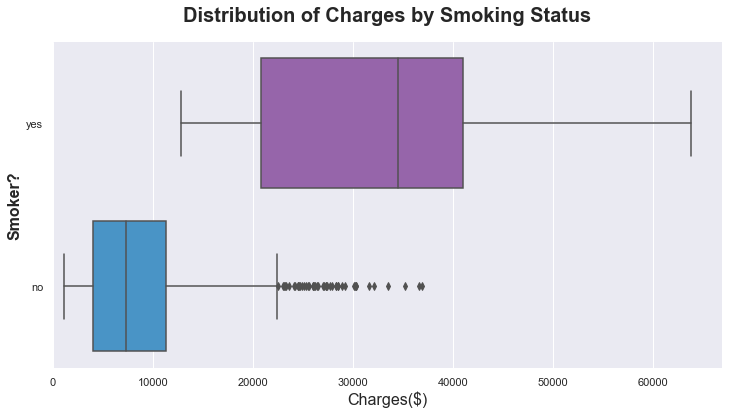

In [59]:
# Set the style and background color
sb.set_style("whitegrid")
sb.set_palette("pastel")
sb.set(rc={"figure.facecolor": "white"})

# Set the figure size and font size
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})

# Create the boxplot
sb.boxplot(x='charges', y='smoker', data=df, orient='h', palette=["#9b59b6","#3498db"])

# Set the axis labels and title
plt.xlabel('Charges($)', fontsize=16)
plt.ylabel('Smoker?', fontsize=16, fontweight='bold')
plt.title('Distribution of Charges by Smoking Status', fontsize=20, fontweight='bold', pad=20)

# Set the x-axis limits
plt.xlim(0, None)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Display the plot
plt.show()


From the box plot plotted above, we can observe the following:

- The median charges for non-smokers is significantly lower than that of smokers.
- The interquartile range (IQR) for non-smokers is much narrower than that of smokers, indicating that there is less variability in charges for non-smokers.
- For smokers, there are several outliers with very high charges, indicating that there are some smokers who incur much higher medical expenses than the others.

Overall, there is a VERY clear difference in the distribution of charges between smokers and non-smokers. This prompted us to do some furthur analysis on the co-variable relationship; smokers with other indicators AGAINST charges. We conducted this experiment on Tableau and found some very insightful trends...

---

Link to Dashboard: https://public.tableau.com/app/profile/kauthar.ahmed/viz/InsuranceDataDashboard/Dashboard1#1

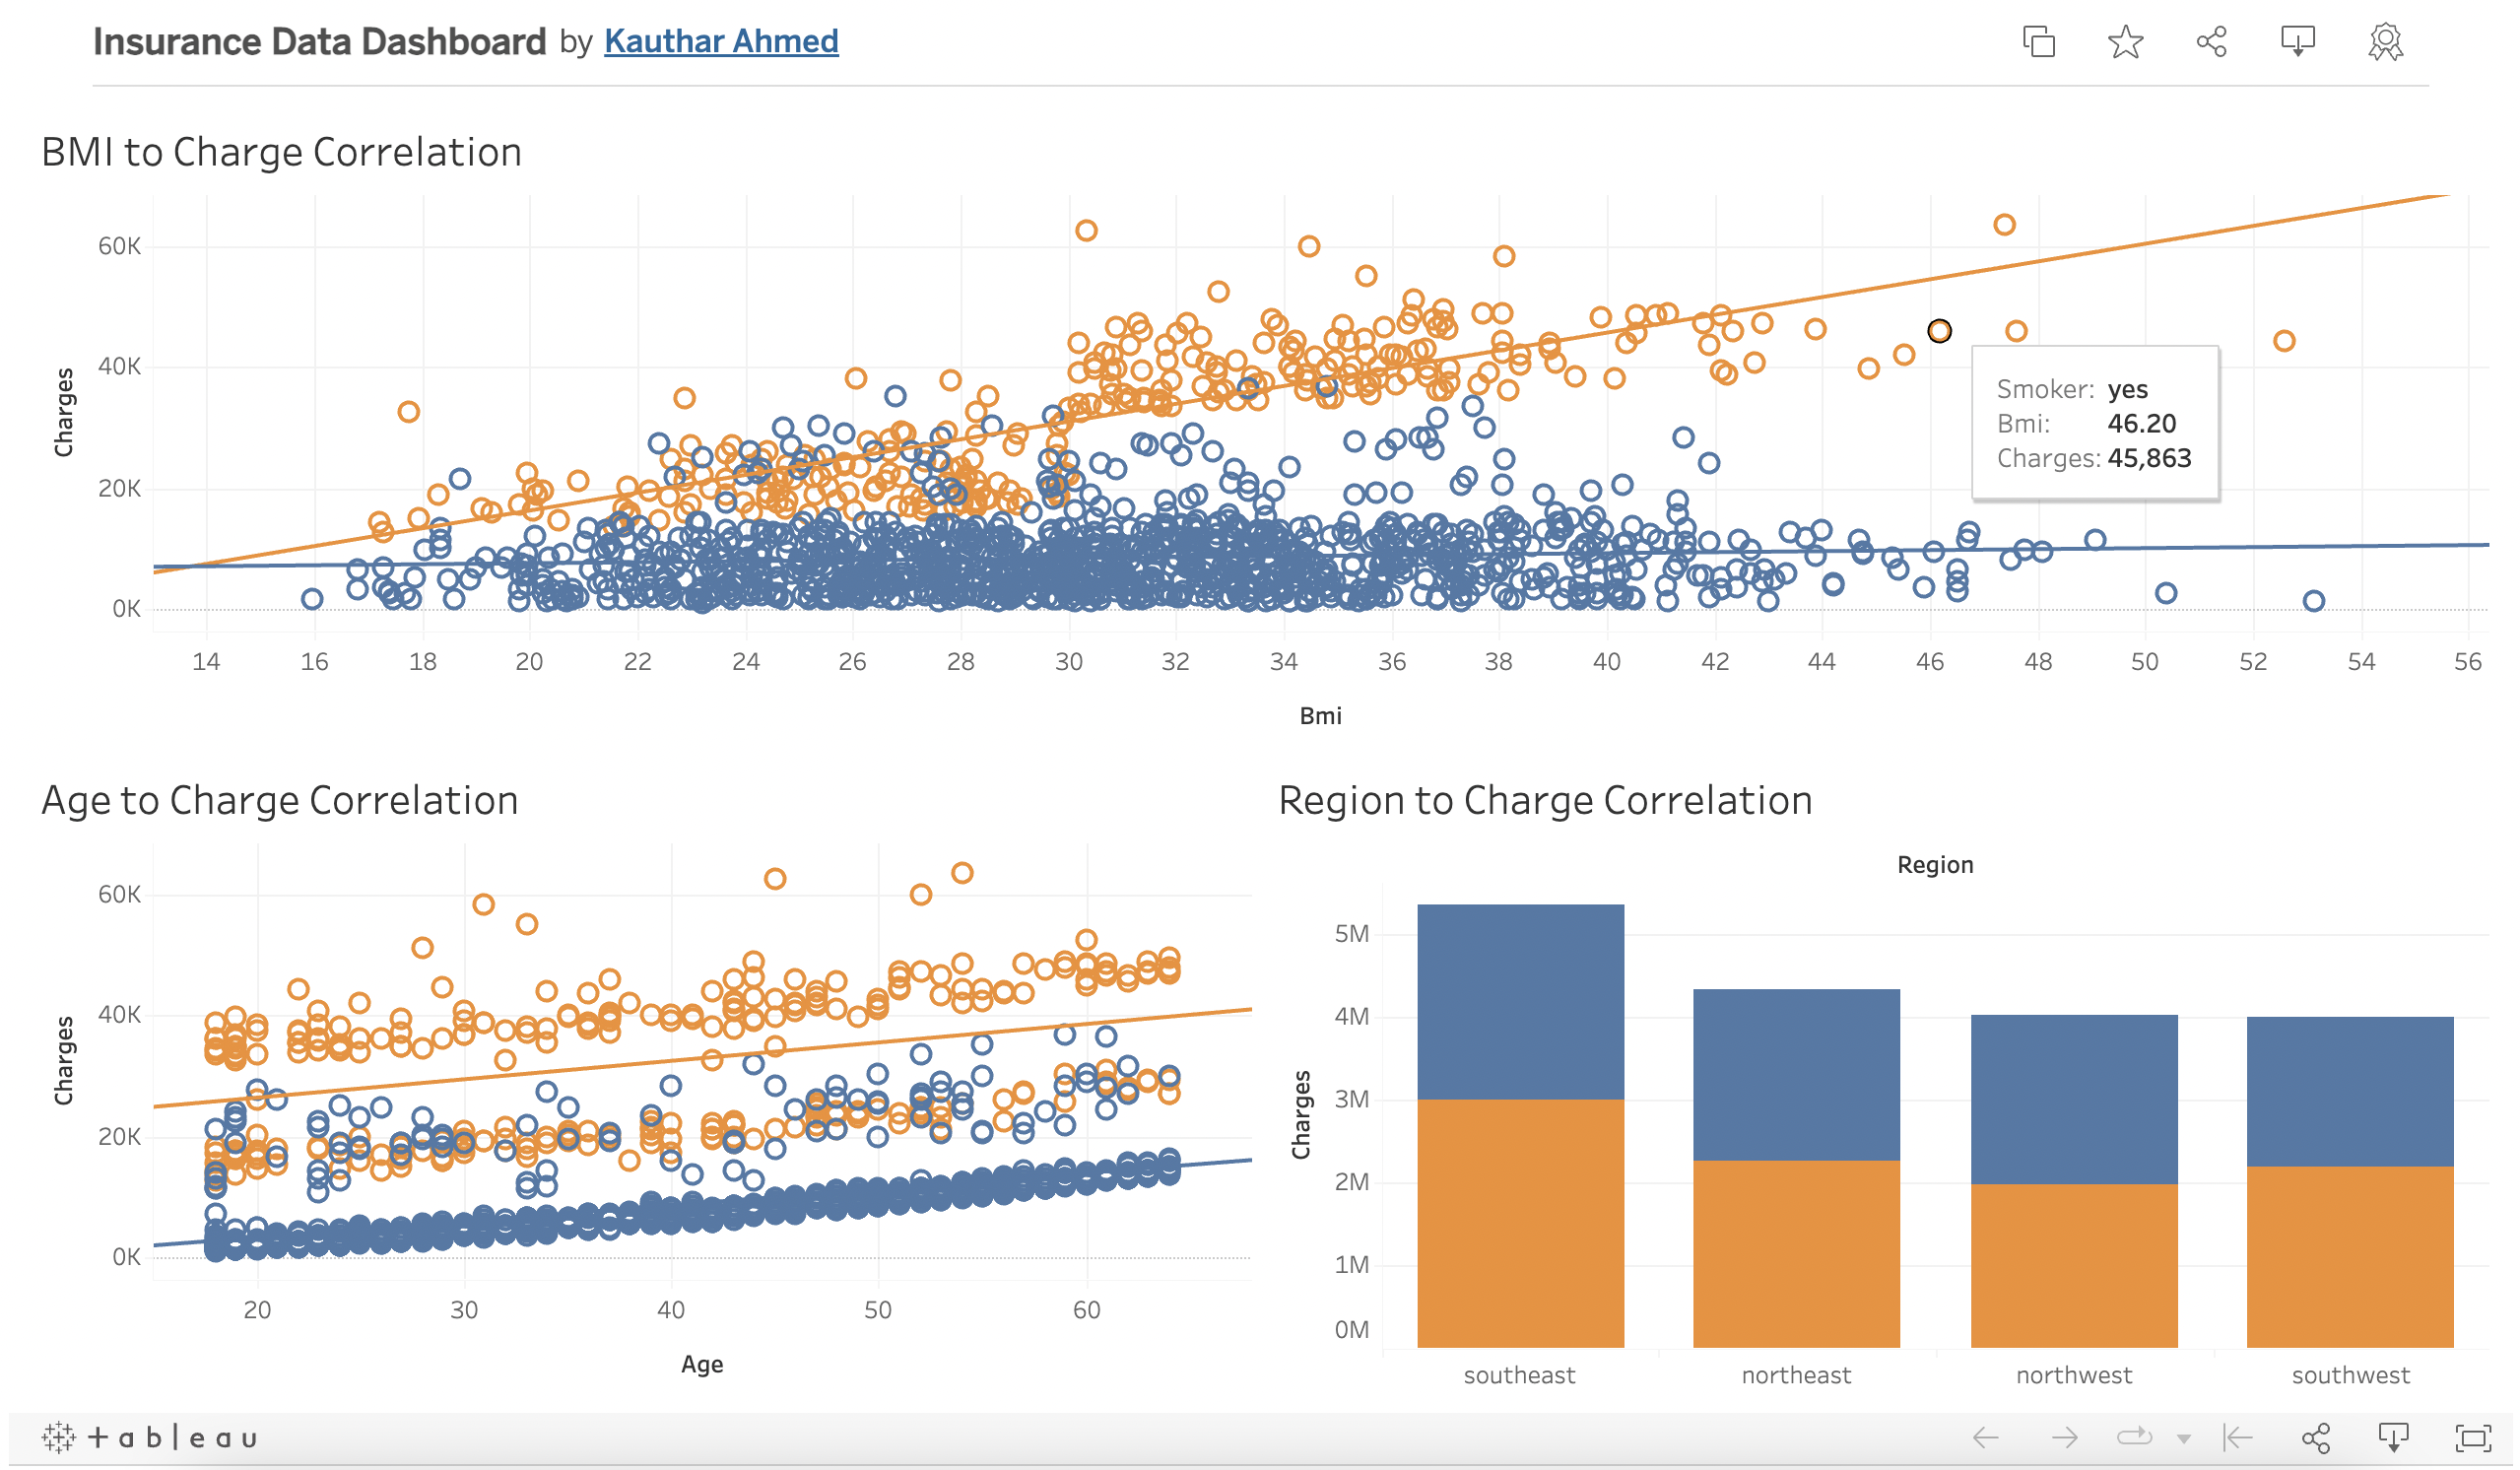

In [56]:
from IPython.display import Image
Image(filename='/Users/kauthar/Desktop/dashboard.png')

The screenshot above is a snippet of our findings. For the two scatter plots, BLUE == Non-Smoker while ORANGE == Smoker. It is now visually much clearer (for both BMI and Age) to find a distinction in distribution patterns.

Notable features:
- The BMI trend is linearly much steeper for smokers as compared to the non-smokers.
- There is a clear charge gap (~20,000 dollars) between smokers and non-smokers across ALL ages.
---
We can use the quantitative information drawn from Tableau to strengthen our chosen ML model. 


## Machine Learning Models
---
Evaluation Metrics: Model Score(R^2) and Root Mean Square Error(RMSE)


### Linear Regression


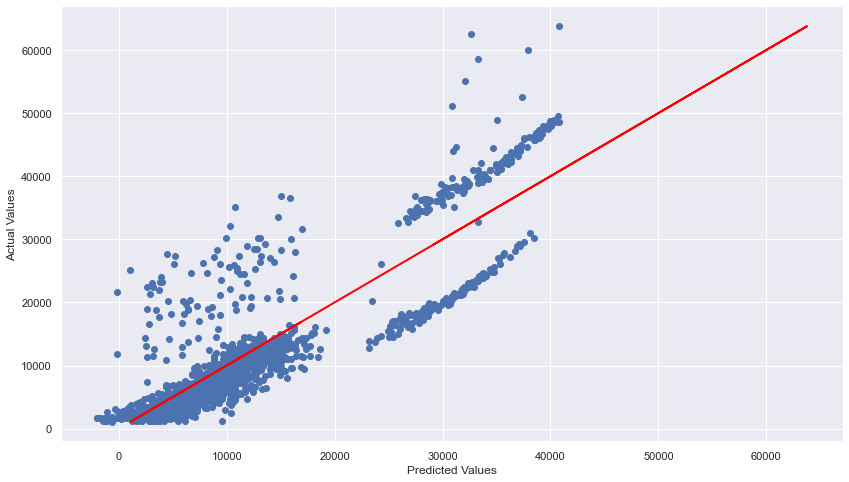

Model score: 0.7999876970680435
RMSE: 5641.626558850189


In [79]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])
X = data.drop(['charges'], axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

X = sm.add_constant(X)
regressor = sm.OLS(y, X)
results = regressor.fit()
plt.figure(figsize=(14, 8))
plt.scatter(results.predict(X), y)
plt.plot(y, y, color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Model score:', r2)
print('RMSE:', rmse)

By merely implementing a basic Linear Regression model, we were able to obtain a Model score of 0.8 and a RMSE value of 5641.63. IDEALLY, all the points would lie on the red line. However, that is almost never the case in real life, especially with something as unpredictable as insurance charges. As such, we see that the data points lie quite 'randomly' away from the red line (y=x). Moving forward, we must try to reduce this 'randomness' by using more complex algorithms in ML models.


### Decision Tree


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import mean_squared_error, r2_score

insurance_df = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')
def preprocess_inputs(df):
    df = df.copy()
    y = df['charges']
    X = df.drop('charges', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_inputs(insurance_df)
nominal_features = ['sex', 'smoker', 'region']

nominal_transformer = Pipeline(steps=[ ('onehot', OneHotEncoder(sparse=False, drop='if_binary'))])

preprocessor = ColumnTransformer(transformers=[('nominal', nominal_transformer, nominal_features)], remainder='passthrough')

model = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('Model score:', r2)
print('RMSE:', rmse)

Model score: 0.7790088905693209
RMSE: 5743.6655686042295


The Decision Tree model is moderately effective in predicting insurance charges. Its predictions are, on average, about $ 5743.67 off from the actual charges, based on the root mean square error (RMSE) value.

Its Model score tellus us that approximately 77 percent of the variation in the target variable (charges) can be explained by the input features in the model. This means the model is capable of capturing a significant portion of the variation in charges, which is a good indication of its predictive capability.

Though, its performance seems to be consistent with that of a basic linear regression model. 


### Extreme Gradient Boosting (XGBoost)


In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False)
cat_features = ['sex', 'smoker', 'region']
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_features]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
data = pd.concat([data, one_hot_encoded], axis=1)

# Dropping the original categorical features
data = data.drop(cat_features, axis=1)

# Splitting the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training an XGBoost model on the TRAIN data
model = xgb.XGBRegressor(n_estimators=1000, max_depth=4, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Evaluating model on the testing data
score = model.score(X_test, y_test)
print("Model score:", score)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


/Users/kauthar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model score: 0.8497768722564931
RMSE: 4829.280487081496


With a Model Score of 84.9%, this implementation of a "Baseline" XGBoost alone, serves as our MOST ACCURATE Machine Learning prediction model. We have a much better measure of how well the model fits the data. Additionally, the Root Mean Square value shows that the average deviation of the predictions from the actual values is only $ 4829.28 now. 

---
As our chosen model, we proceed to use the insights gained earlier from EDA and Tableau to strengthen its predictive power.


In [15]:
# Improving the model by including various 'FEATURE IMORTANCE', based on our EDA

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')

# Compute charges using linear regression models for smokers and non-smokers (against bmi and age)
charges_bmi = []
charges_age = []
for i in range(len(data)):
    if data.loc[i, 'smoker'] == 'yes':
        charges_bmi.append(1473.11 * data.loc[i, 'bmi'] - 13186.6)
        charges_age.append(305.238 * data.loc[i, 'age'] + 20294.1)
    else:
        charges_bmi.append(83.3506 * data.loc[i, 'bmi'] + 5879.42)
        charges_age.append(267.249 * data.loc[i, 'age'] - 2091.42)

data['charges_bmi'] = charges_bmi
data['charges_age'] = charges_age

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False)
cat_features = ['sex', 'smoker', 'region']
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_features]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
data = pd.concat([data, one_hot_encoded], axis=1)
data = data.drop(cat_features, axis=1)

# Splitting the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set the weights for the smoker, bmi, and age variables to be higher for smokers
sample_weights = []
for i in range(len(X_train)):
    if X_train.iloc[i]['smoker_yes'] == 1:
        sample_weights.append(0.75)
    else:
        sample_weights.append(1)
    if X_train.iloc[i]['smoker_yes'] == 1:
        sample_weights[i] *= (X_train.iloc[i]['charges_bmi'] / np.mean(X_train['charges_bmi']))
        sample_weights[i] *= (X_train.iloc[i]['charges_age'] / np.mean(X_train['charges_age']))

# Training an XGBoost model on the TRAIN data
model = xgb.XGBRegressor(n_estimators=700, max_depth=3, learning_rate=0.011, random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weights)

# Evaluating model on the testing data
score = model.score(X_test, y_test)
print("Model score:", score)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


/Users/kauthar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model score: 0.9027406368656771
RMSE: 3664.791205860928



#### By introducing additional hyperparameters such as 'charges_bmi' and 'charges_age' under the  categorisation of boolean smoker values, we are able to develop a stronger XGBoost model (with better XGBRegressor arguments as well). The EDA we conducted gave us insights on the influence of BMI, Age and Smoker variables. Therefore, by adding "weights" appropriately to these factors and applying linear trends observed, our improved model has a Model Score of over 90% and a much lower RMSE value of 3664.79.

---

In [16]:
# "BASELINE" Model (with callable function)

import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False)
cat_features = ['sex', 'smoker', 'region']
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_features]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
data = pd.concat([data, one_hot_encoded], axis=1)
data = data.drop(cat_features, axis=1)

# Training an XGBoost model on the entire dataset
model = xgb.XGBRegressormodel = xgb.XGBRegressor(n_estimators=1000, max_depth=4, learning_rate=0.05, random_state=42)
model.fit(data.drop('charges', axis=1), data['charges'])

def predict_charges(age, sex, bmi, children, smoker, region):
    # Converting the input values into a pandas dataframe
    input_df = pd.DataFrame({'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]})

    # One-hot encoding: for categorical features
    one_hot_encoded = pd.DataFrame(one_hot_encoder.transform(input_df[cat_features]))
    one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
    input_df = pd.concat([input_df, one_hot_encoded], axis=1)
    input_df = input_df.drop(cat_features, axis=1)

    # Use TRAINED XGBoost model to predict the charges
    prediction = model.predict(input_df)[0]
    return prediction


/Users/kauthar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [100]:
# Improved Model (with callable function)

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')

# Compute charges using linear regression models for smokers and non-smokers (against bmi and age)
charges_bmi = []
charges_age = []
for i in range(len(data)):
    if data.loc[i, 'smoker'] == 'yes':
        charges_bmi.append(1473.11 * data.loc[i, 'bmi'] - 13186.6)
        charges_age.append(305.238 * data.loc[i, 'age'] + 20294.1)
    else:
        charges_bmi.append(83.3506 * data.loc[i, 'bmi'] + 5879.42)
        charges_age.append(267.249 * data.loc[i, 'age'] - 2091.42)

data['charges_bmi'] = charges_bmi
data['charges_age'] = charges_age

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False)
cat_features = ['sex', 'smoker', 'region']
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_features]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
data = pd.concat([data, one_hot_encoded], axis=1)
data = data.drop(cat_features, axis=1)

# Splitting the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the weights for the smoker, bmi, and age variables to be higher for smokers
sample_weights = []
for i in range(len(X_train)):
    if X_train.iloc[i]['smoker_yes'] == 1:
        sample_weights.append(0.75)
    else:
        sample_weights.append(1)
    if X_train.iloc[i]['smoker_yes'] == 1:
        sample_weights[i] *= (X_train.iloc[i]['charges_bmi'] / np.mean(X_train['charges_bmi']))
        sample_weights[i] *= (X_train.iloc[i]['charges_age'] / np.mean(X_train['charges_age']))

# Training an XGBoost model on the entire dataset
model = xgb.XGBRegressor(n_estimators=700, max_depth=3, learning_rate=0.011, random_state=42)
model.fit(data.drop('charges', axis=1), data['charges'])

def IMPROVED_predict_charges(age, sex, bmi, children, smoker, region):
    # Compute charges using linear regression models for smokers and non-smokers (against bmi and age)
    if smoker == 'yes':
        charges_bmi = 1473.11 * bmi - 13186.6
        charges_age = 305.238 * age + 20294.1
    else:
        charges_bmi = 83.3506 * bmi + 5879.42
        charges_age = 267.249 * age - 2091.42

    # Converting the input values into a pandas dataframe
    input_df = pd.DataFrame({'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region], 'charges_bmi': [charges_bmi], 'charges_age': [charges_age]})

    # One-hot encoding for categorical features
    one_hot_encoded = pd.DataFrame(one_hot_encoder.transform(input_df[cat_features]))
    one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
    input_df = pd.concat([input_df, one_hot_encoded], axis=1)
    input_df = input_df.drop(cat_features, axis=1)

    # Use TRAINED XGBoost model to predict the charges
    prediction = model.predict(input_df)[0]
    return prediction


/Users/kauthar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



### Tool for Insurance Analysts
---


In [102]:
import ipywidgets as widgets
from IPython.display import display

# Create widgets for input
age_widget = widgets.IntSlider(description="Age:", min=18, max=100, value=30, style={'description_width': 'initial'})
sex_widget = widgets.Dropdown(options=[('Male', 'male'), ('Female', 'female')], description="Sex:", style={'description_width': 'initial'})
bmi_widget = widgets.FloatText(description="BMI:", min=10, max=50, value=20, style={'description_width': 'initial'})
children_widget = widgets.IntSlider(description="Children:", min=0, max=10, value=0, style={'description_width': 'initial'})
smoker_widget = widgets.Dropdown(options=[('No', 'no'), ('Yes', 'yes')], description="Smoker:", style={'description_width': 'initial'})
region_widget = widgets.Dropdown(options=[('Northeast', 'northeast'), ('Northwest', 'northwest'), ('Southeast', 'southeast'), ('Southwest', 'southwest')], description="Region:", style={'description_width': 'initial'})

# Define a function to handle user input
def handle_submit(sender):
    # Get the current values of widgets
    age_value = age_widget.value
    sex_value = sex_widget.value
    bmi_value = bmi_widget.value
    children_value = children_widget.value
    smoker_value = smoker_widget.value
    region_value = region_widget.value
    print(str(age_value)+" year old "+sex_value+" with "+str(children_value)+" children, living in the "+region_value)
    print("BMI -> "+str(bmi_value))
    print("Smoker? "+smoker_value)
    
    # Call the predict_charges function with user input
    IMPROVED_predicted_charges = IMPROVED_predict_charges(age_value, sex_value, bmi_value, children_value, smoker_value, region_value)

    # Display the predicted charges
    print('Predicted charges: $', round(IMPROVED_predicted_charges, 2))

# Define a button to submit user input
submit_button = widgets.Button(description='Predict Charges', button_style='success')
submit_button.on_click(handle_submit)

# Display the input widgets and submit button
display(age_widget, sex_widget, bmi_widget, children_widget, smoker_widget, region_widget, submit_button)


IntSlider(value=30, description='Age:', min=18, style=SliderStyle(description_width='initial'))

Dropdown(description='Sex:', options=(('Male', 'male'), ('Female', 'female')), style=DescriptionStyle(descript…

FloatText(value=20.0, description='BMI:', style=DescriptionStyle(description_width='initial'))

IntSlider(value=0, description='Children:', max=10, style=SliderStyle(description_width='initial'))

Dropdown(description='Smoker:', options=(('No', 'no'), ('Yes', 'yes')), style=DescriptionStyle(description_wid…

Dropdown(description='Region:', options=(('Northeast', 'northeast'), ('Northwest', 'northwest'), ('Southeast',…

Button(button_style='success', description='Predict Charges', style=ButtonStyle())

User Test Cases (index) : 100, 111, 121